In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
example= x_train[0]

In [10]:
example.shape

(28, 28)

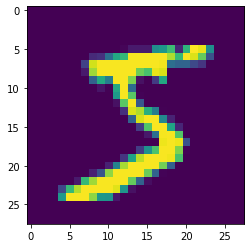

In [11]:
plt.imshow(example)

In [12]:
# default color mapping is vivid, it represent only two color scheme. we can change it to show gray scale only

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_train.shape

(60000,)

In [15]:
# we have to convert the numbers into various categories, it seems numbers to the network. we have to use one hot encoding to convert
# these numbers into categories


In [20]:
from tensorflow.keras.utils import to_categorical
y_cat_train= to_categorical(y_train,  num_classes=10)
y_cat_test= to_categorical(y_test, num_classes=10)


In [21]:
y_cat_test.shape

(10000, 10)

In [22]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [23]:
y_train[1]

0

In [24]:
#normalization of images is simple
x_scaled_train= x_train/255
x_scaled_test= x_test/255

In [25]:
x_scaled_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
#reshaping data to 4D
x_train.shape

(60000, 28, 28)

In [27]:
x_train.reshape(60000, 28, 28,1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [28]:
x_scaled_train= x_scaled_train.reshape(60000, 28, 28,1)

In [30]:
x_scaled_test= x_scaled_test.reshape(10000, 28, 28,1)

In [46]:
x_train= x_train.reshape(60000, 28, 28,1)
x_test= x_test.reshape(10000, 28, 28,1)

In [31]:
# batch size, width, height, color channel. this is 1 channel sample

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [54]:
model= Sequential()
model.add(Conv2D(filters= 32, kernel_size= (4,4),strides=(1, 1),padding='valid', input_shape= (28,28,1), activation= 'relu'))
#after convolution layer , there comes a pooling layer. we use maxpool
model.add(MaxPool2D(pool_size=(2,2)))


#after Pooling we have to flatten the image and then apply the dense layers
model.add(Flatten())


model.add(Dense(128, activation= 'relu'))

#Output layer
model.add(Dense(10, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

# keras.io/metrics to view different options

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor= 'val_loss', patience=1)

In [56]:
model.fit(x_scaled_train, y_cat_train,epochs=10, validation_data=(x_scaled_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 591us/sample - loss: 0.1357 - accuracy: 0.9604 - val_loss: 0.0661 - val_accuracy: 0.9793
Epoch 2/10
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0410 - val_accuracy: 0.9866
Epoch 3/10
60000/60000 [==============================] - 37s 615us/sample - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0560 - val_accuracy: 0.9816


In [57]:
metrics= pd.DataFrame(model.history.history)

In [58]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135650,0.960417,0.066084,0.9793
1,0.045788,0.986000,0.041049,0.9866
2,0.029962,0.990583,0.056029,0.9816


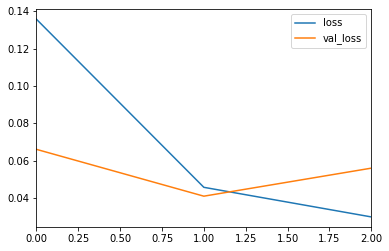

In [59]:
metrics[['loss', 'val_loss']].plot()

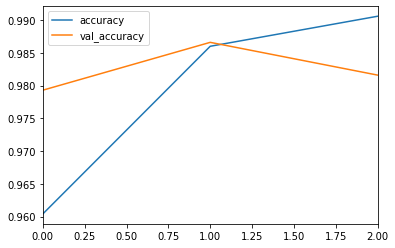

In [60]:
metrics[['accuracy', 'val_accuracy']].plot()

In [61]:
model.evaluate(x_scaled_test, y_cat_test, verbose= 0)

[0.05602905920310877, 0.9816]

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
predictions= model.predict_classes(x_scaled_test)

In [65]:
predictions.shape

(10000,)

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.96      0.99      0.97      1028
           8       1.00      0.95      0.97       974
           9       1.00      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [67]:
print(confusion_matrix(y_test, predictions))

[[ 975    1    2    0    0    0    1    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    2 1023    0    0    0    1    5    0    0]
 [   0    0    4 1004    0    0    0    2    0    0]
 [   0    1    1    0  976    0    1    2    0    1]
 [   2    0    1   11    0  873    3    0    2    0]
 [  10    3    0    0    4    5  936    0    0    0]
 [   0    1    6    0    0    0    0 1021    0    0]
 [  11    1   13    3    7    1    3    4  928    3]
 [   1    4    3    4   15    2    0   34    0  946]]


In [68]:
#viewing results as heatmap
import seaborn as sns


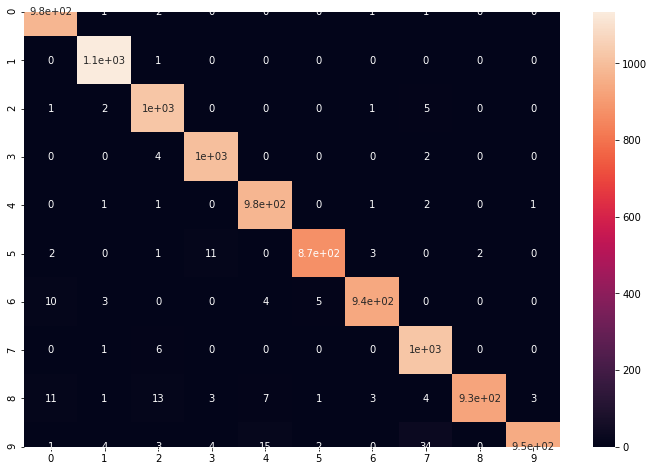

In [71]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [72]:
#prediction
new_image= x_scaled_test[3]

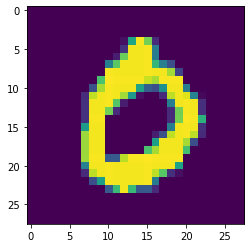

In [75]:
plt.imshow(new_image.reshape(28,28))

In [77]:
model.predict_classes(new_image.reshape(1,28,28,1))

array([0], dtype=int64)

In [ ]:
#CNN has performed well on MNIST Dataset
